Assignment-4

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Count')

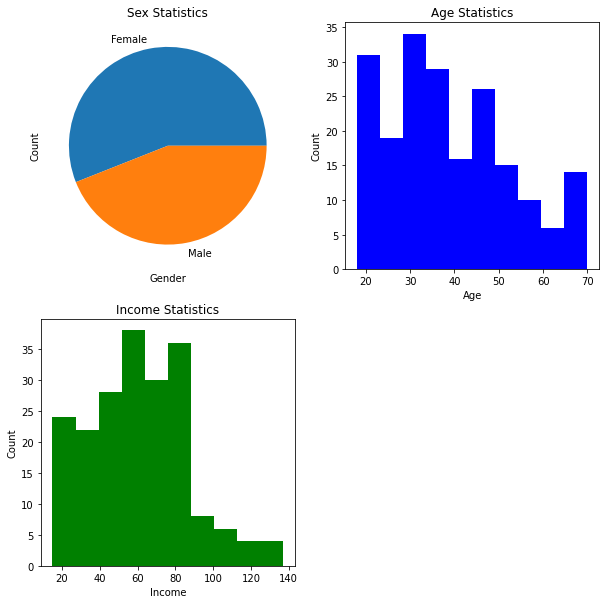

In [16]:
#3 Univariate analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
counts = df['Gender'].value_counts()
plt.subplot(221)
plt.pie(counts, labels = counts.index)
plt.title('Sex Statistics')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(222)
plt.hist(df['Age'],color='blue')
plt.title('Age Statistics')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(223)
plt.hist(df['Annual Income (k$)'],color='green')
plt.title('Income Statistics')
plt.xlabel('Income')
plt.ylabel('Count')

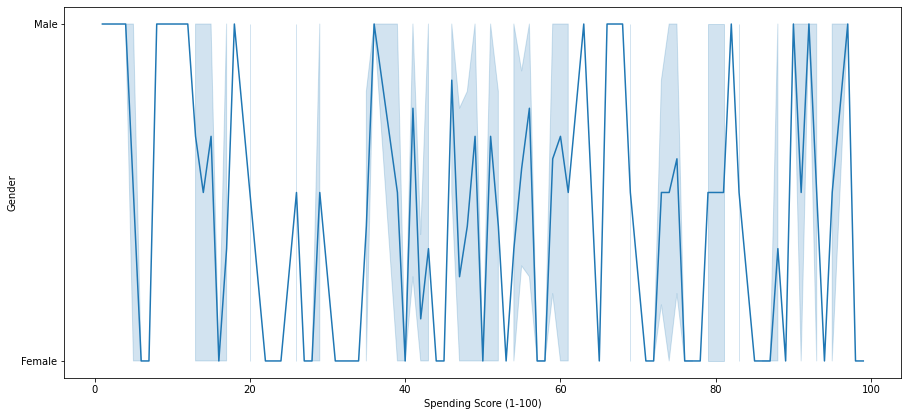

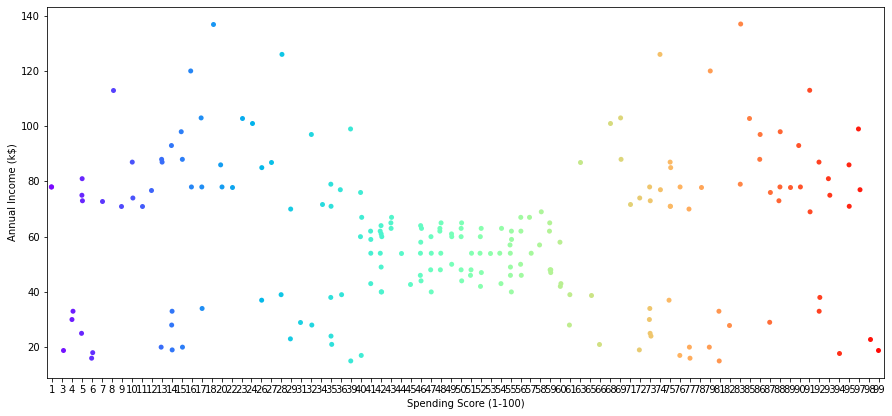

In [17]:
#3 Bivariate Analysis
import seaborn as sns

plt.figure(figsize=(15,15))

#Categorical vs Continuous
plt.subplot(2,1,1)
sns.lineplot(data = df, x = 'Spending Score (1-100)', y =  'Gender')

plt.figure(figsize=(15,15))
#Continuous vs Continuous
plt.subplot(2,1,1)
sns.stripplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, palette='rainbow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24a651e410>,
      dtype=object)

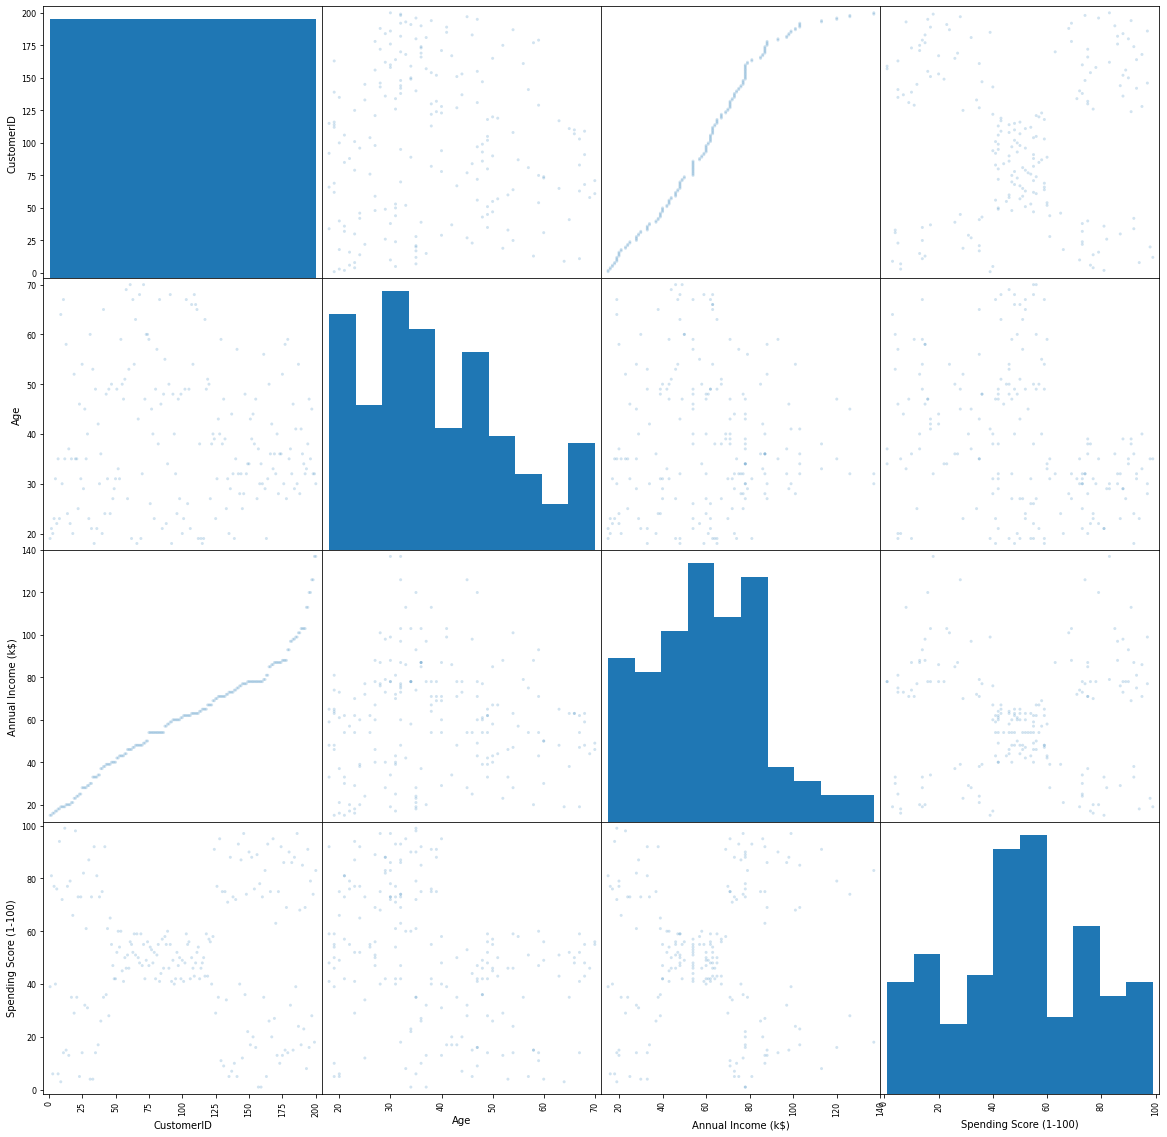

In [18]:
#3 Multivariate Analysis

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))

In [19]:
#4
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
#5 Handling missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
#For Continuous variables 								
df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)
df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

#For Categorical variables
df['Gender'].fillna(df['Gender'].mode(), inplace=True)

In [24]:
#Ensuring again
print(df.isnull().sum())  

print('\n\Gender : ', df['Gender'].unique())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

\Gender :  ['Male' 'Female']


No. of Outliers :  12


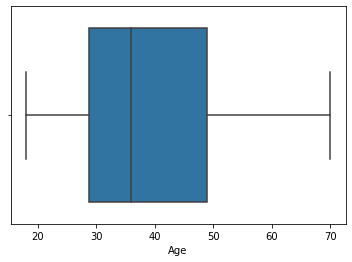

In [25]:
#6 Outlier detection - box plot 	
import seaborn as sns
sns.boxplot(df['Age'])
print('No. of Outliers : ', (df['Age'] < 20).sum() + (df['Age']>70).sum())

In [26]:
#6 Outlier detection - zscore 	
from scipy import stats
zscore = np.abs(stats.zscore(df['Annual Income (k$)']))
print(zscore)
print('No. of Outliers : ', np.shape(np.where(zscore>3)))

0      1.738999
1      1.738999
2      1.700830
3      1.700830
4      1.662660
         ...   
195    2.268791
196    2.497807
197    2.497807
198    2.917671
199    2.917671
Name: Annual Income (k$), Length: 200, dtype: float64
No. of Outliers :  (1, 0)


No. of Outliers :  0


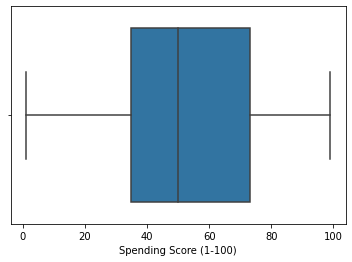

In [27]:
#6 Outlier detection - box plot 		
sns.boxplot(df['Spending Score (1-100)'])
print('No. of Outliers : ', (df['Spending Score (1-100)'] > 100).sum()+ (df['Spending Score (1-100)'] <0).sum())

In [28]:
#6 Removing Outliers
columns = ['Age',  'Spending Score (1-100)',  'Annual Income (k$)']

for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [29]:
#After outlier removal
columns = ['Age',  'Spending Score (1-100)',  'Annual Income (k$)']

for i in columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(df[i] >upper))
  count = count + np.size(np.where(df[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  Age  :  0
No. of outliers in  Spending Score (1-100)  :  0
No. of outliers in  Annual Income (k$)  :  0


In [30]:
#7  Label Encoding
print('Before encoding : ', df['Gender'][0])
df['Gender'] = df['Gender'].astype('category')

df['Gender'] = df['Gender'].cat.codes
print('After encoding : ', df['Gender'][0])

df['Gender'].dtype

Before encoding :  Male
After encoding :  1


dtype('int8')

In [31]:
df.dtypes

CustomerID                  int64
Gender                       int8
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [32]:
#Changing target column(Exited) as the last column

Exit = df['Spending Score (1-100)']
df = df.drop('Spending Score (1-100)', axis=1)
df = df.join(Exit)

In [33]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15.0,39.0


In [34]:
X = df.iloc[:, :]

In [35]:
#8 Scaling
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
1           2       1  21.0                15.0                    81.0
2           3       0  20.0                16.0                     6.0


After scaling : 
 [[-0.98994975  1.         -0.74074074 -1.2739726   0.81045752]
 [-0.9798995   0.         -0.79012346 -1.24657534 -1.1503268 ]]


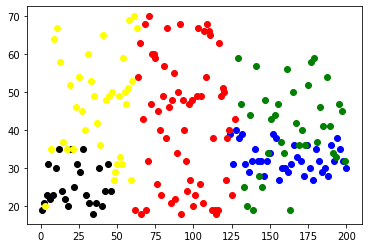

In [36]:
#9 Clustering
from sklearn.cluster import KMeans
cols = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(df)

l_0 = df[label == 0]
l_1 = df[label == 1]
l_2 = df[label == 2]
l_3 = df[label == 3]
l_4 = df[label == 4]

plt.scatter(l_0[cols[0]] , l_0[cols[1]], color = 'black')
plt.scatter(l_1[cols[0]] , l_1[cols[1]], color = 'blue')
plt.scatter(l_2[cols[0]] , l_2[cols[1]], color = 'yellow')
plt.scatter(l_3[cols[0]] , l_3[cols[1]], color = 'green')
plt.scatter(l_4[cols[0]] , l_4[cols[1]], color = 'red')
plt.show()

In [37]:
#10 Adding cluster
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19.0,15.0,39.0,0
1,2,1,21.0,15.0,81.0,0
2,3,0,20.0,16.0,6.0,2
3,4,0,23.0,16.0,77.0,0
4,5,0,31.0,17.0,40.0,0


In [38]:
#11 Splitting dependent and independent variables
X = df.iloc[:, :-1]
print('Independent : \n', X.head(2))

Y = df.iloc[:, -1]
print('Dependent : \n', Y.head(2))

Independent : 
    CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1       1  19.0                15.0                    39.0
1           2       1  21.0                15.0                    81.0
Dependent : 
 0    0
1    0
Name: Cluster, dtype: int32


In [39]:
#12 Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(160, 5) (40, 5) (160,) (40,)


In [40]:
#13 Build the model
from sklearn.linear_model import LogisticRegression as log_mod
model = log_mod()

In [41]:
#14 Training the model
LogisticRegression = model.fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print(f"Determination coeeficient: {r_sq}")

Determination coeeficient: 0.9375


In [42]:
#13 Testing the model
Y_pred = model.predict(X_test)

In [43]:
print('Predicted values : ', Y_pred[:5])

Predicted values :  [2 4 4 2 2]


In [44]:
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Y_test, Y_pred)
mean_squared_error = mean_squared_error(Y_test, Y_pred)
rmse = (np.sqrt(mean_squared_error))

print('R2 score : ', r2)
print('Mean squared error : ', mean_squared_error)
print('Root Mean squared error : ', rmse)

R2 score :  1.0
Mean squared error :  0.0
Root Mean squared error :  0.0


In [45]:
model.score(X_train, Y_train)

0.9375

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[ 1,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 14]])

In [47]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

